bias =  0.02448652645211607
rmse =  0.33304589233610027


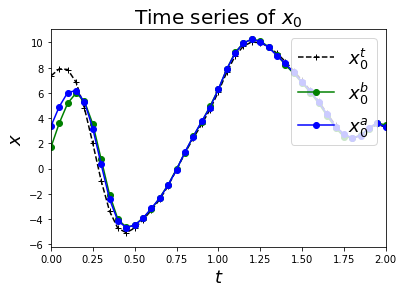

bias =  -0.0343348439204415
rmse =  0.3095876742430547


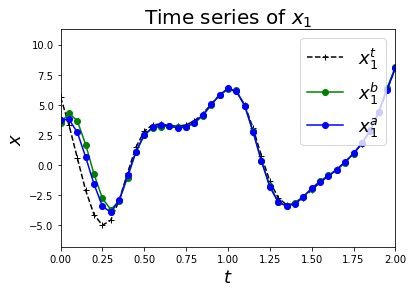

bias =  0.09949359428276441
rmse =  0.36169801554104825


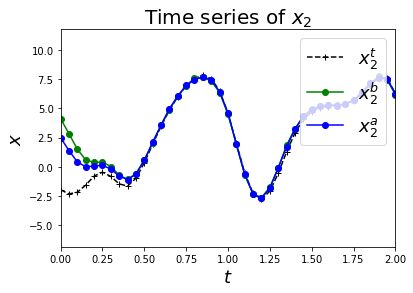

bias =  -0.016446690865769557
rmse =  0.19047380522247886


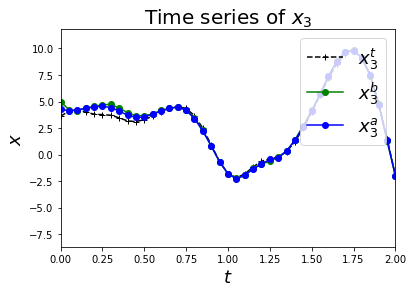

bias =  -0.0794891541605473
rmse =  0.1961768096169318


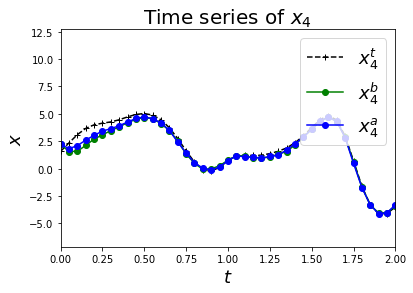

bias =  0.09065422577041618
rmse =  0.22994607896418132


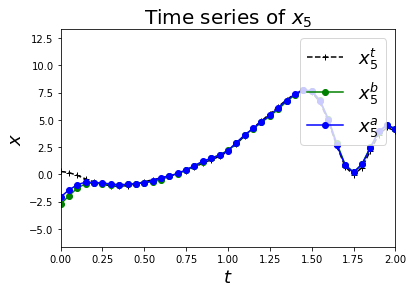

bias =  0.0621402171333607
rmse =  0.23189043761798803


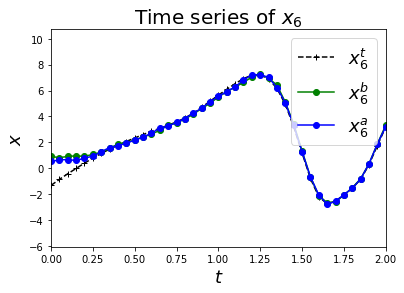

bias =  -2.5376332488305963e-05
rmse =  0.17658084740962124


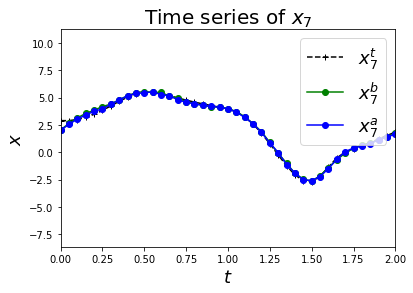

bias =  0.11880693216229929
rmse =  0.28188796682883666


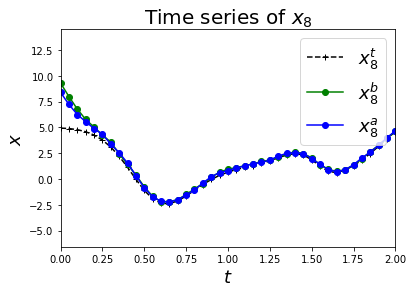

bias =  0.028121771103936922
rmse =  0.1732523563926648


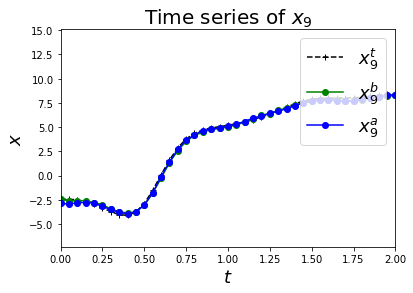

bias =  0.002354131230057571
rmse =  0.25049355864967693


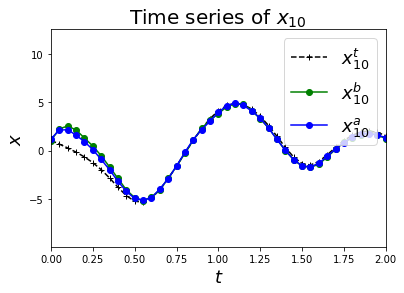

bias =  -0.02040619176907295
rmse =  0.5623335736293936


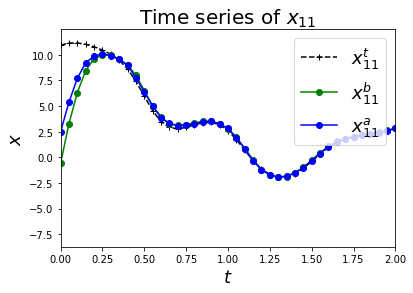

bias =  -0.060732147553744543
rmse =  0.26193370044587194


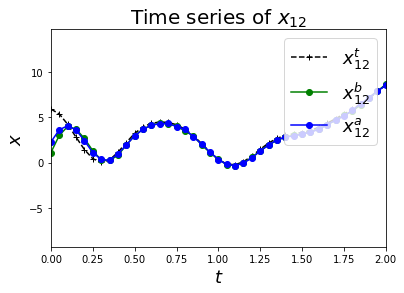

bias =  0.02116926258451076
rmse =  0.43051496517474624


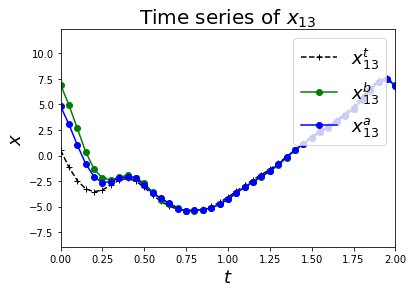

bias =  0.023143487678076592
rmse =  0.23291700958871966


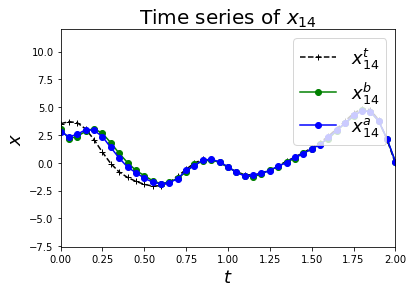

bias =  -0.07886055765464074
rmse =  0.592207014978507


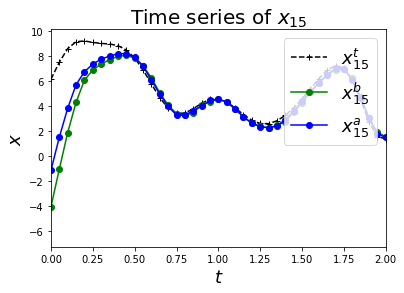

bias =  0.031149188252980634
rmse =  0.455324157252691


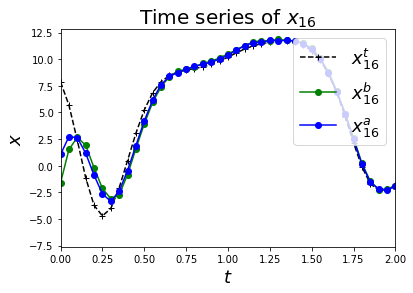

bias =  0.06860488702996567
rmse =  0.3062666389992274


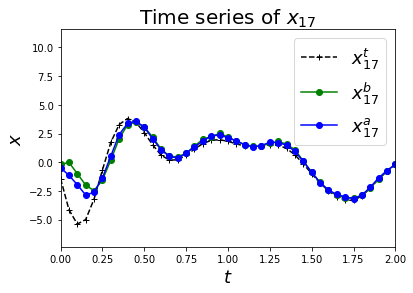

bias =  -0.07062577288144156
rmse =  0.27736820472910484


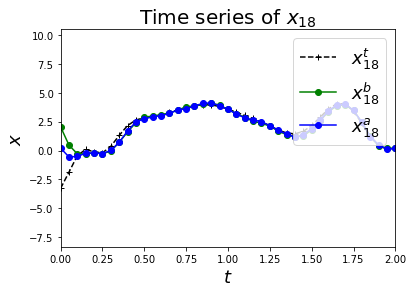

bias =  0.004237582502368282
rmse =  0.4229218178587473


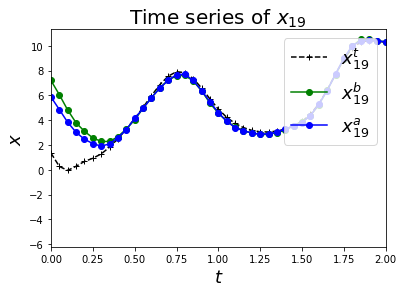

bias =  -0.01146734428107205
rmse =  0.2823736455779705


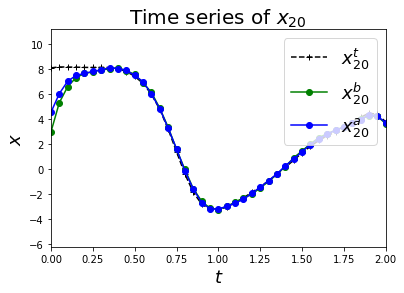

bias =  -0.04187025134677949
rmse =  0.24338622013257435


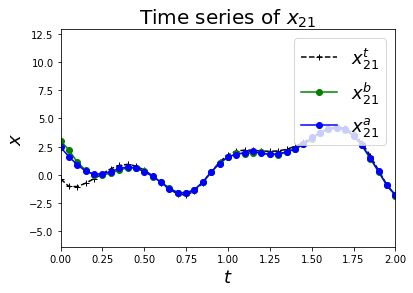

bias =  0.014045821966913825
rmse =  0.41875174403297377


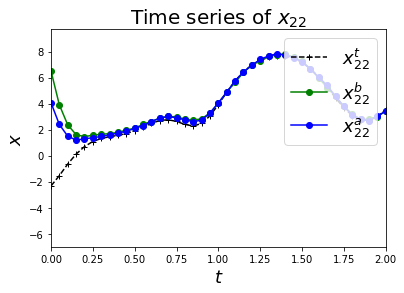

bias =  0.022531325186348258
rmse =  0.24934105568615325


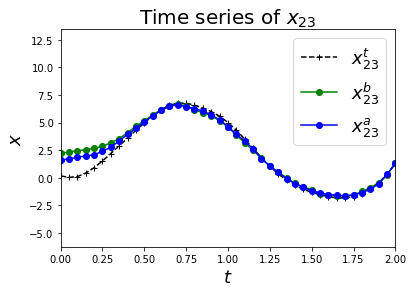

bias =  0.027528866103556832
rmse =  0.18569671419930733


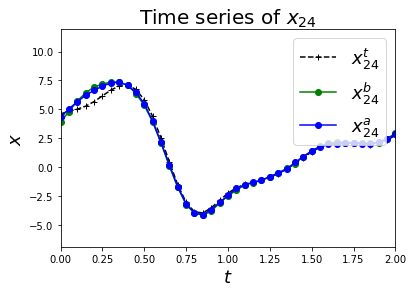

bias =  -0.015592231366538185
rmse =  0.28161821508728774


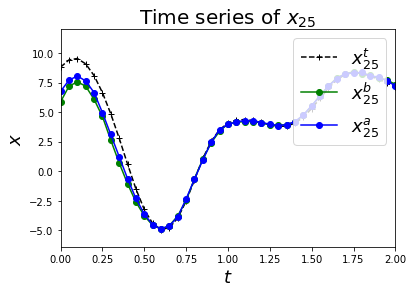

bias =  -0.04539232676899472
rmse =  0.17664701312658837


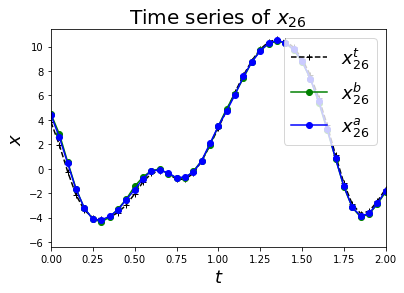

bias =  -0.033281807506420034
rmse =  0.19376646428313482


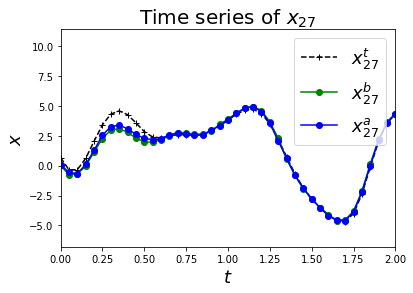

bias =  0.02987207467657474
rmse =  0.17536079815637512


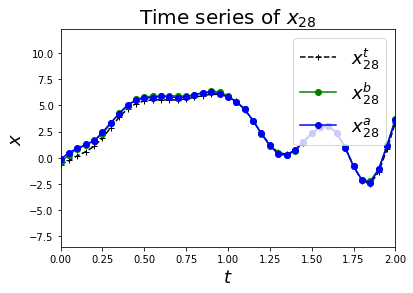

bias =  0.008657311509175383
rmse =  0.3299572392535501


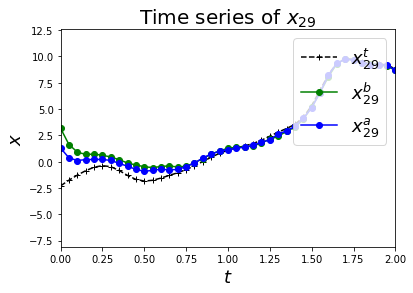

bias =  0.10905274087800866
rmse =  0.6189876622215048


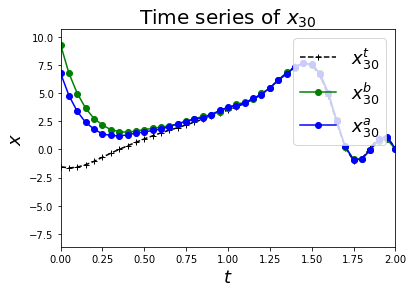

bias =  -0.023616010858524807
rmse =  0.4575612662717045


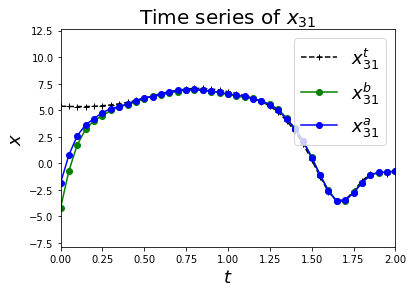

bias =  -0.010848189839258287
rmse =  0.28875812019251484


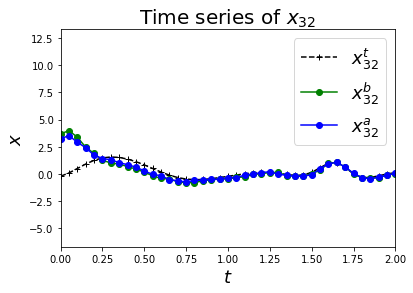

bias =  -0.014794231936936887
rmse =  0.17526769422251087


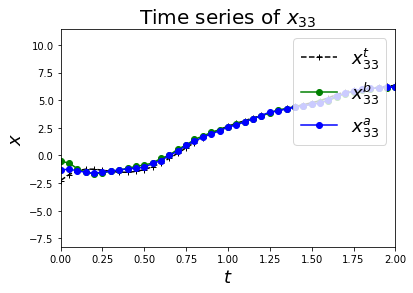

bias =  0.015085972738847252
rmse =  0.2932217753712561


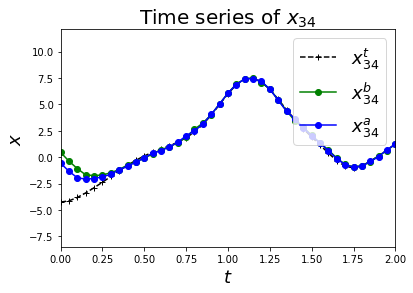

bias =  0.03202240671284759
rmse =  0.33243954907389034


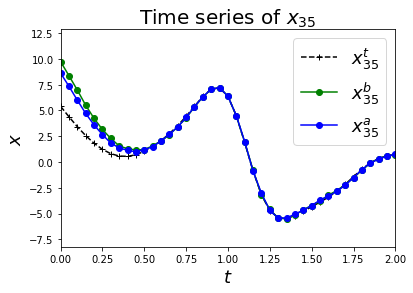

bias =  0.04550849920621955
rmse =  0.18420704308403896


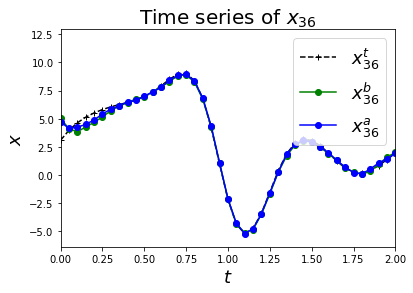

bias =  -0.0411678243686509
rmse =  0.207783615628094


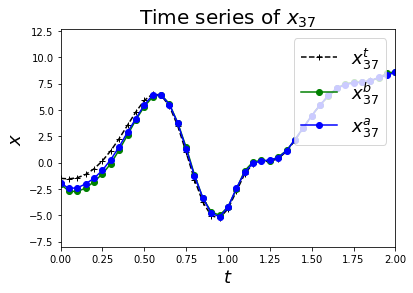

bias =  -0.004857551384134264
rmse =  0.15146412045219443


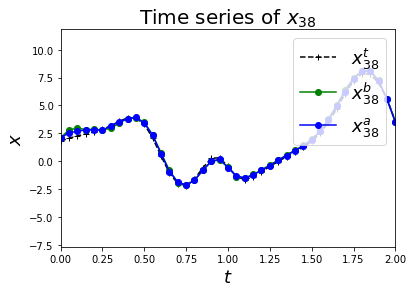

bias =  0.05708480253676113
rmse =  0.3134042191665245


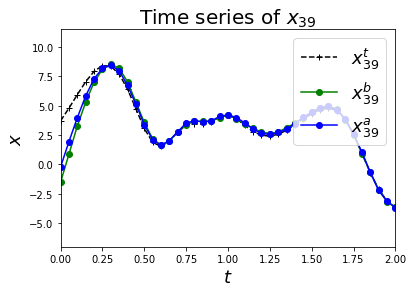

In [115]:
"""
Plot the data assimilation results
Read:
  x_t.txt
  x_b.txt
  x_a.txt
"""
import numpy as np
from settings import *
import matplotlib.pyplot as plt
N = 40

# load data
x_t_save = np.genfromtxt('x_t.txt')
x_b_save = np.genfromtxt('x_b_k20_l10.txt')
x_a_save = np.genfromtxt('x_a_k20_l10.txt')


# Plot time series of a single grid point
bias_v = []
rmse_v = []

for i in range(N):
    pt = i
    plt.figure()
    #print(x_a_save[:,pt-1])
    #print(x_b_save[:,pt-1])
    
    plt.plot(np.arange(nT+1) * dT, x_t_save[:,pt-1], 'k+--', label=r'$x^t_{' + str(pt) + '}$')
    plt.plot(np.arange(nT+1) * dT, x_b_save[:,pt-1], 'go-' , label=r'$x^b_{' + str(pt) + '}$')
    plt.plot(np.arange(nT+1) * dT, x_a_save[:,pt-1], 'bo-' , label=r'$x^a_{' + str(pt) + '}$')
    bias_i = (x_b_save[:,pt-1]-x_t_save[:,pt-1]).mean()
    print("bias = ", bias_i)
    rmse_i = np.std(x_b_save[:,pt-1]-x_t_save[:,pt-1])
    print("rmse = ", rmse_i)
    bias_v.append(bias_i)
    rmse_v.append(rmse_i)
    
    plt.xlabel(r'$t$', size=18)
    plt.ylabel(r'$x$', size=18)
    plt.xlim(0,2)
    plt.title(r'Time series of $x_{' + str(pt) + '}$', size=20)
    plt.legend(loc='upper right', numpoints=1, prop={'size':18})
    #plt.savefig('timeseries.png', dpi=200)
    plt.show()
    plt.close()

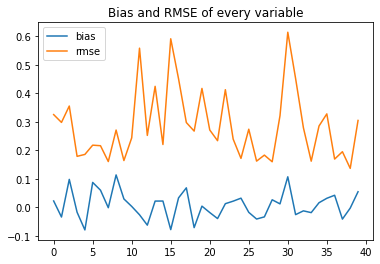

In [111]:
#per variable

plt.plot(np.arange(N),bias_v, label="bias")
plt.plot(np.arange(N),rmse_v, label="rmse")
plt.legend(loc="upper left")
plt.title("Bias and RMSE of every variable")
plt.show()

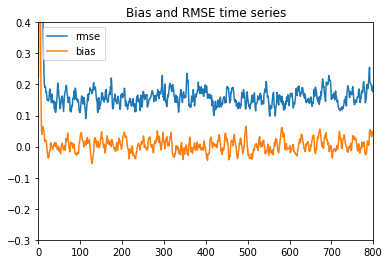

In [112]:
analysis_error = x_b_save-x_t_save
bias_t = []
rmse_t = []
for i in range(nT):
    
    bias_i = analysis_error[i][:].mean()
    rmse_i = np.std(analysis_error[i][:])
    bias_t = np.append(bias_t, bias_i)
    rmse_t = np.append(rmse_t, rmse_i)


plt.plot(rmse_t, label ="rmse" )
plt.plot(bias_t, label = "bias")
plt.ylim(-0.3,0.4)
plt.xlim(0,800)
plt.legend(loc="upper left")
plt.title("Bias and RMSE time series")
plt.show()

In [113]:
rmse = rmse_t[30:800].mean()
bias = bias_t[30:800].mean()
print(rmse)

0.15772007067021132
